# Project 2: Regression for Prediction Problems
In this report we use data from the CDC and the American Community Survey to predict diabetes rates at the county level. This report should inform decisions about where to target a pilot diabetes prevention program. 

## 1. Exploratory Data Analysis
Our data is a combination of variables from the CDC and the ACS at the county level. We have information from 3220 counties. Variables included the population counts of people with diabetes, who are obese, and who are physically inactive, and population counts of people by race, ethnicity, age, and sex. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
diabetes = pd.read_csv("Diabetes with Population Info by County 2017.csv")
diabetes.head()

,County,State,CountyFIPS,Diabetes_Number,Obesity_Number,Physical_Inactivity_Number,sex and age_total population_65 years and over_sex ratio (males per 100 females),race_total population,race_total population_one race,race_total population_two or more races,...,sex and age_total population_21 years and over,sex and age_total population_62 years and over,sex and age_total population_65 years and over,sex and age_total population_18 years and over_1,sex and age_total population_18 years and over_male,sex and age_total population_18 years and over_female,sex and age_total population_18 years and over_sex ratio (males per 100 females),sex and age_total population_65 years and over_1,sex and age_total population_65 years and over_male,sex and age_total population_65 years and over_female
0,Autauga County,Alabama,1001,12525,13489,12525,76.5,55200,54170,1030,...,39614,9403,8050,41831,20054,21777,92.1,8050,3488,4562
1,Baldwin County,Alabama,1003,40024,48542,40024,86.6,208107,204535,3572,...,155502,49811,40665,162430,78104,84326,92.6,40665,18870,21795
2,Barbour County,Alabama,1005,5431,8009,5431,76.2,25782,25429,353,...,19394,5658,4634,20346,10923,9423,115.9,4634,2004,2630
3,Bibb County,Alabama,1007,5827,6534,5827,80.5,22527,22340,187,...,16864,4323,3661,17868,9578,8290,115.5,3661,1633,2028
4,Blount County,Alabama,1009,14365,14227,14365,79.7,57645,56710,935,...,42232,12400,10233,44177,21595,22582,95.6,10233,4540,5693


In [3]:
# number of rows 
len(diabetes)

3220

In [4]:
# list of variable names (long)
#list(diabetes.columns.values)

# type of each variable
diabetes.dtypes

County                                                                               object
State                                                                                object
CountyFIPS                                                                            int64
Diabetes_Number                                                                      object
Obesity_Number                                                                       object
                                                                                     ...   
sex and age_total population_18 years and over_female                                 int64
sex and age_total population_18 years and over_sex ratio (males per 100 females)    float64
sex and age_total population_65 years and over_1                                      int64
sex and age_total population_65 years and over_male                                   int64
sex and age_total population_65 years and over_female                           

**Data Cleaning**

While the population counts are all numeric, as expected, the counts for diabetes, people who are obese, and people who are inactive are strings. Some of these columns contain missing data, which is recorded as the string "No Data". We replace these in the original data frame with "NaN", which python understands to be missing. There are 78 rows with missing diabetes counts. After replacing the missing rows, we convert these columns to floats. 

In [5]:
diabetes.replace({"No Data":np.nan}, inplace = True)
diabetes.isnull().sum()

County                                                                               0
State                                                                                0
CountyFIPS                                                                           0
Diabetes_Number                                                                     78
Obesity_Number                                                                      78
                                                                                    ..
sex and age_total population_18 years and over_female                                0
sex and age_total population_18 years and over_sex ratio (males per 100 females)     0
sex and age_total population_65 years and over_1                                     0
sex and age_total population_65 years and over_male                                  0
sex and age_total population_65 years and over_female                                0
Length: 95, dtype: int64

In [6]:
diabetes['Diabetes_Number'] = diabetes["Diabetes_Number"].astype(float)
diabetes['Obesity_Number'] = diabetes["Obesity_Number"].astype(float)
diabetes['Physical_Inactivity_Number'] = diabetes["Physical_Inactivity_Number"].astype(float)
diabetes.dtypes

County                                                                               object
State                                                                                object
CountyFIPS                                                                            int64
Diabetes_Number                                                                     float64
Obesity_Number                                                                      float64
                                                                                     ...   
sex and age_total population_18 years and over_female                                 int64
sex and age_total population_18 years and over_sex ratio (males per 100 females)    float64
sex and age_total population_65 years and over_1                                      int64
sex and age_total population_65 years and over_male                                   int64
sex and age_total population_65 years and over_female                           

In [7]:
diabetes.describe()

,CountyFIPS,Diabetes_Number,Obesity_Number,Physical_Inactivity_Number,race_total population,race_total population_one race,race_total population_two or more races,race_total population_one race_1,race_total population_one race_white,race_total population_one race_black or african american,...,sex and age_total population_21 years and over,sex and age_total population_62 years and over,sex and age_total population_65 years and over,sex and age_total population_18 years and over_1,sex and age_total population_18 years and over_male,sex and age_total population_18 years and over_female,sex and age_total population_18 years and over_sex ratio (males per 100 females),sex and age_total population_65 years and over_1,sex and age_total population_65 years and over_male,sex and age_total population_65 years and over_female
count,3220.000000,3.142000e+03,3.142000e+03,3.142000e+03,3.220000e+03,3.220000e+03,3220.000000,3.220000e+03,3.220000e+03,3.220000e+03,...,3.220000e+03,3.220000e+03,3.220000e+03,3.220000e+03,3.220000e+03,3.220000e+03,3220.000000,3.220000e+03,3220.000000,3220.000000
mean,31393.605280,1.758797e+04,2.296606e+04,1.758797e+04,1.013323e+05,9.803687e+04,3295.423292,9.803687e+04,7.366104e+04,1.282022e+04,...,7.412272e+04,1.906676e+04,1.549044e+04,7.827602e+04,3.809320e+04,4.018282e+04,99.439317,1.549044e+04,6850.940683,8639.495342
std,16292.078954,4.903968e+04,6.353903e+04,4.903968e+04,3.260964e+05,3.142309e+05,13032.711931,3.142309e+05,2.012548e+05,5.514027e+04,...,2.384994e+05,5.470009e+04,4.432602e+04,2.513513e+05,1.220023e+05,1.293948e+05,14.740158,4.432602e+04,19234.567636,25111.933583
min,1001.000000,1.800000e+01,1.000000e+01,1.800000e+01,7.500000e+01,6.000000e+01,0.000000,6.000000e+01,1.600000e+01,0.000000e+00,...,6.900000e+01,1.900000e+01,1.200000e+01,7.100000e+01,3.600000e+01,3.100000e+01,70.800000,1.200000e+01,0.000000,10.000000
25%,19032.500000,2.230500e+03,2.777250e+03,2.230500e+03,1.121425e+04,1.090100e+04,169.750000,1.090100e+04,9.050250e+03,1.167500e+02,...,8.314250e+03,2.583750e+03,2.111500e+03,8.691500e+03,4.355250e+03,4.285250e+03,93.000000,2.111500e+03,984.750000,1126.000000
50%,30024.000000,5.519500e+03,6.811000e+03,5.519500e+03,2.595050e+04,2.537900e+04,492.000000,2.537900e+04,2.161750e+04,8.380000e+02,...,1.936550e+04,5.704500e+03,4.698500e+03,2.026050e+04,9.997500e+03,1.019050e+04,96.500000,4.698500e+03,2129.500000,2548.000000
75%,46105.500000,1.352175e+04,1.805500e+04,1.352175e+04,6.655225e+04,6.497525e+04,1742.500000,6.497525e+04,5.711775e+04,5.591000e+03,...,4.906400e+04,1.435650e+04,1.171375e+04,5.200525e+04,2.557400e+04,2.664950e+04,100.800000,1.171375e+04,5234.000000,6314.500000
max,72153.000000,1.262753e+06,1.686908e+06,1.262753e+06,1.009805e+07,9.700372e+06,397680.000000,9.700372e+06,5.186859e+06,1.230494e+06,...,7.433332e+06,1.610630e+06,1.299277e+06,7.851531e+06,3.827779e+06,4.023752e+06,414.700000,1.299277e+06,561006.000000,738271.000000


**Distribution of Diabetes Cases** 

We start our report with some descriptive plots. Our goal here is to explore variation in diabetes numbers across counties. We also look at a couple of predictors that we suspect might be important for prediction later on.  

We plot a histogram of diabetes cases as the county level. We plot this both as number of cases and as number of cases per 100 people, as the counties vary in population size. 

In [8]:
# calculate diabetes cases per 100 people
diabetes['diabetes_per100'] = diabetes['Diabetes_Number']/diabetes['race_total population']*100

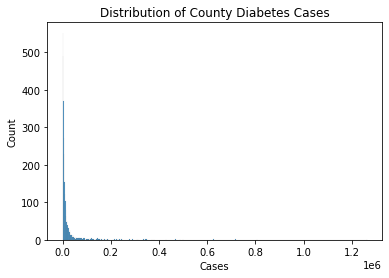

In [16]:
#diabetes cases across counties
sns.histplot(data = diabetes, x = 'Diabetes_Number')
plt.title("Distribution of County Diabetes Cases")
plt.xlabel("Cases");

The plot above shows that the distribution of cases across counties is extremely right skewed, likely driven by counties with very large populations. Logging the case numbers makes the distribution easier to see. 

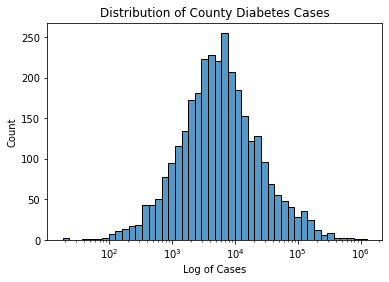

In [18]:
sns.histplot(data = diabetes, x = 'Diabetes_Number', log_scale= True)
plt.title("Distribution of County Diabetes Cases")
plt.xlabel("Log of Cases");

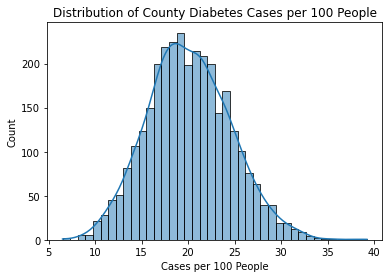

In [13]:
# diabetes per 100 people
sns.histplot(data = diabetes, x = 'diabetes_per100', kde = True)
plt.title("Distribution of County Diabetes Cases per 100 People")
plt.xlabel("Cases per 100 People");

The plot above shows that the percentage of people with diabetes is roughly normally distributed across counties, with a mean around 20%. This is twice as high as the percentage of the population with diabetes reported by the [American Diabetes Association](https://www.diabetes.org/resources/statistics/statistics-about-diabetes), which puts the figure at around 10%. 